In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

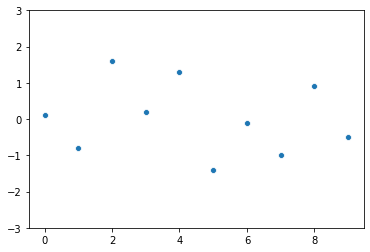

In [2]:
arms = np.array([0.1, -0.8, 1.6, 0.2, 1.3, -1.4, -0.1, -1.0, 0.9, -0.5])
optimal = np.argmax(arms)

sns.scatterplot(data=arms)
plt.ylim(-3, 3)

plt.show()

In [3]:
# parameters
n_steps = 1000
n_iters = 200
epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]     # epsilon greedy
Q0s = [1/4, 1/2, 1, 2, 4]                     # optimistic initial value
cs = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]           # UCB
alphas = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2]    # gradient bandit

avg_rewards = {}
avg_rewards_unstationary = {}

In [4]:
def get_reward(action):
    return np.random.normal(arms[action], 1)

def softmax(H):
    e = np.array(list(map(lambda x: np.exp(x), H)))
    return e / sum(e)

get_reward(1)

-0.7242392038268811

In [5]:
def multi_arm_bandits(e=0.1, oiv=0, ucb=0, gradient_alpha=0, unstationary=False, n_steps=n_steps, n_iters=n_iters):
    
    global arms
    
    total_iter_rewards = 0
    n_arms = len(arms)
    
    for iter in tqdm(range(n_iters)):
    
        arms = np.array([0.1, -0.8, 1.6, 0.2, 1.3, -1.4, -0.1, -1.0, 0.9, -0.5])
        Qs = np.ones(n_arms) * oiv
        Ns = np.ones(n_arms) * 0.00001
        Hs = np.zeros(n_arms)
        total_step_rewards = 0
        
        for step in range(n_steps):
            
            if ucb:
                action = np.argmax(Qs + c * np.sqrt(np.log((step+1)/Ns)) )
            elif gradient_alpha:
                action = np.argmax(Hs)
            else:
                action = np.argmax(Qs) if np.random.rand() > e else np.random.randint(n_arms)
            
            
            reward = get_reward(action)

            Ns[action] += 1
            
            if unstationary:
                Qs[action] += 0.1 * (reward - Qs[action])
                arms += np.random.normal(0, 0.01, 10)
            else:
                Qs[action] += (reward - Qs[action]) / Ns[action]
                
            total_step_rewards += reward
            
            Hs = Hs + gradient_alpha * (reward - total_step_rewards/(step+1)) * (np.eye(n_arms)[action] - softmax(Hs))

        total_iter_rewards += total_step_rewards
            
        
    return total_iter_rewards / n_steps / n_iters

In [41]:
avg_rewards['greedy'] = []

for e in epsilons:
    avg_rewards['greedy'].append(multi_arm_bandits(e=e))
    
print(avg_rewards['greedy'])


[1.4540380237595443, 1.4949829813527296, 1.4794262228653148, 1.4464110904057157, 1.3618794512578674, 1.1761465850620194]


In [45]:
avg_rewards['oiv'] = []

for Q0 in Q0s:
    avg_rewards['oiv'].append(multi_arm_bandits(oiv=Q0))
    
print(avg_rewards['oiv'])


[1.3991708527902649, 1.4098025725212806, 1.3891154677658997, 1.3693162010394206, 1.3774435553931808]


In [56]:
avg_rewards['ucb'] = []

for c in cs:
    avg_rewards['ucb'].append(multi_arm_bandits(ucb = c))
    
print(avg_rewards['ucb'])


[1.5661460213479956, 1.549905180690406, 1.5334822981258174, 1.4957145744812201, 1.3948487692416947, 1.115738226565218, 0.6805049139843388]


In [68]:
avg_rewards['gradient'] = []

for alpha in alphas:
    avg_rewards['gradient'].append(multi_arm_bandits(gradient_alpha = alpha))
    
print(avg_rewards['gradient'])


[1.5246496035702553, 1.5233304227606812, 1.523142312535577, 1.5302845590802456, 1.4696610841136026, 1.4082273121523894, 1.2953865197512515]


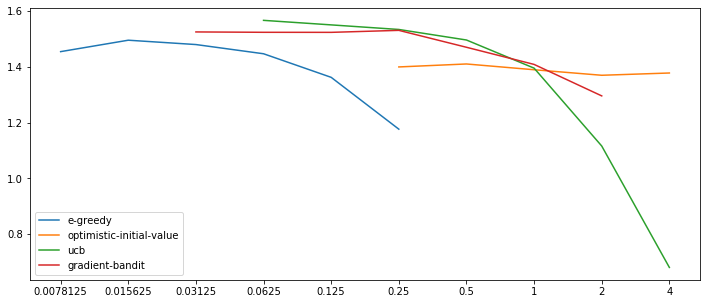

In [71]:
plt.figure(figsize=(12, 5))

plt.plot(list(map(str, epsilons)), avg_rewards['greedy'])
plt.plot(list(map(str, Q0s)), avg_rewards['oiv'])
plt.plot(list(map(str, cs)), avg_rewards['ucb'])
plt.plot(list(map(str, alphas)), avg_rewards['gradient'])

plt.legend(['e-greedy', 'optimistic-initial-value', 'ucb', 'gradient-bandit'])

plt.show()

In [11]:
avg_rewards_unstationary['greedy'] = []

for e in epsilons:
    avg_rewards_unstationary['greedy'].append(multi_arm_bandits(e=e, unstationary=True))
    
print(avg_rewards_unstationary['greedy'])


[1.55761440185927, 1.5326436621934991, 1.5094685204516791, 1.4781794916450535, 1.3541387000797729, 1.1713432356879847]


In [12]:
avg_rewards_unstationary['oiv'] = []

for Q0 in Q0s:
    avg_rewards_unstationary['oiv'].append(multi_arm_bandits(oiv=Q0, unstationary=True))
    
print(avg_rewards_unstationary['oiv'])


[1.4173003863127287, 1.4383077264288868, 1.432934282568737, 1.377498942426833, 1.3017738113882475]


In [ ]:
avg_rewards_unstationary['ucb'] = []

for c in cs:
    avg_rewards_unstationary['ucb'].append(multi_arm_bandits(ucb = c, unstationary=True))
    
print(avg_rewards_unstationary['ucb'])

In [6]:
avg_rewards_unstationary['gradient'] = []

for alpha in alphas:
    avg_rewards_unstationary['gradient'].append(multi_arm_bandits(gradient_alpha = alpha, unstationary=True))
    
print(avg_rewards_unstationary['gradient'])


[1.518668296064223, 1.4934769274173, 1.4949690651165404, 1.4889363714588975, 1.3956297076749384, 1.4391237673121495, 1.3260052180676294]


In [ ]:
avg_rewards_unstationary['greedy'] = [1.55761440185927, 1.5326436621934991, 1.5094685204516791, 1.4781794916450535, 1.3541387000797729, 1.1713432356879847]
avg_rewards_unstationary['oiv'] = [1.4173003863127287, 1.4383077264288868, 1.432934282568737, 1.377498942426833, 1.3017738113882475]

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(list(map(str, epsilons)), avg_rewards_unstationary['greedy'])
plt.plot(list(map(str, Q0s)), avg_rewards_unstationary['oiv'])
plt.plot(list(map(str, cs)), avg_rewards_unstationary['ucb'])
plt.plot(list(map(str, alphas)), avg_rewards_unstationary['gradient'])

plt.legend(['e-greedy', 'optimistic-initial-value', 'ucb', 'gradient-bandit'])

plt.show()